# Homework: K-Means Clustering

For this assignment you will perform clustering analysis on the volatility trading data found in `strategy.csv`.  In particular, you will perform two k-means cluster analyses on the data based on the following pairs of features:

a. `beta` and `stdev`

b. `pnl` and `stdev`

Write up an analysis that addresses the following:

1. Explore the grouping that you generate, and comment on how homogeneous/coherent you think the groupings are.
2. Assume that `pnl` is based on the long version of this strategy.  You could then reverse the sign of all the trades and generate the short side of the short version of this strategy.  Based on statistics you see, and the clustering, construct a long/short version of this strategy in which you take a long postion in 5 of the underlyings, and a short position in 5 of the underlyings.  Defend your portfolio construction based on your analysis.

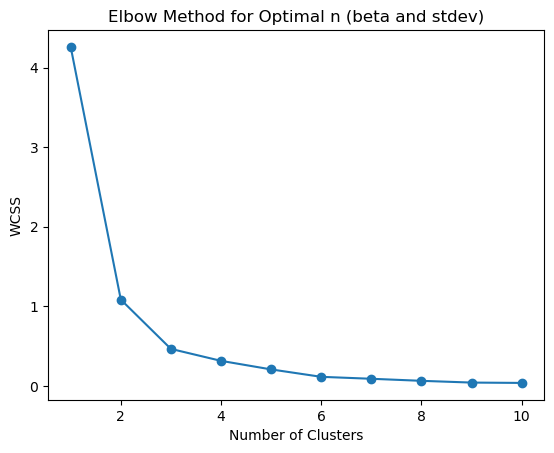

In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Determine WCSS for different values of n
wcss = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(data[['beta', 'stdev']])
    wcss.append(kmeans.inertia_)

# Plot WCSS against the number of clusters
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal n (beta and stdev)')
plt.show()


/var/folders/79/6xh3y3cd7kl6qqpcykmzhz8r0000gn/T/ipykernel_67364/4136559520.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/Users/yuanhanlim/anaconda3/lib/python3.10/site-packages/threadpoolctl.py:1186: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blo

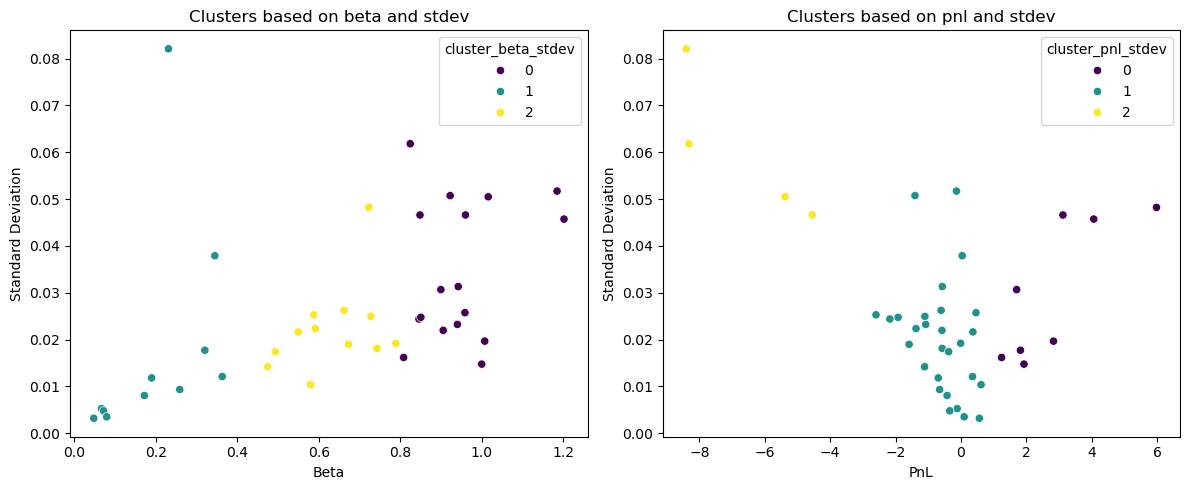

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
data = pd.read_csv("strategy.csv")

# Clustering for 'beta' and 'stdev'
kmeans_beta_stdev = KMeans(n_clusters=3, random_state=0).fit(data[['beta', 'stdev']])
data['cluster_beta_stdev'] = kmeans_beta_stdev.labels_

# Clustering for 'pnl' and 'stdev'
kmeans_pnl_stdev = KMeans(n_clusters=3, random_state=0).fit(data[['pnl', 'stdev']])
data['cluster_pnl_stdev'] = kmeans_pnl_stdev.labels_

# Plotting 'beta' and 'stdev' clusters
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x='beta', y='stdev', hue='cluster_beta_stdev', palette='viridis')
plt.title('Clusters based on beta and stdev')
plt.xlabel('Beta')
plt.ylabel('Standard Deviation')

# Plotting 'pnl' and 'stdev' clusters
plt.subplot(1, 2, 2)
sns.scatterplot(data=data, x='pnl', y='stdev', hue='cluster_pnl_stdev', palette='viridis')
plt.title('Clusters based on pnl and stdev')
plt.xlabel('PnL')
plt.ylabel('Standard Deviation')

plt.tight_layout()
plt.show()




Overall, the beta and stdev clusters appear to be reasonably coherent:

1. Cluster 0 captures high-beta, moderate-to-high-volatility assets.
2. Cluster 1 groups low-beta, low-to-moderate-volatility assets.
3. Cluster 2 groups moderate-beta, moderate volatilities assets.

The pnl and stdev clusters also seem reasonably coherent:

1. Cluster 0 captures profitable assets with high returns, irrespective of volatility.
2. Cluster 1 groups average performers with moderate volatility.
3. Cluster 2 captures underperforming assets, potentially high-risk with high volatility.

## 2. 

For the long positions, I will focus on assets with:

- High pnl values, indicating they have performed well in the long version.
- Moderate-to-low stdev to minimize risk.
- Higher beta values, as these assets might move more significantly with the market, offering upside potential during positive market movements.

For the short positions, I will focus on assets with:
- Negative pnl values, indicating poor performance in the long version, which could perform better in the short version.
- Higher stdev to potentially capture more volatility-driven returns.
- Cluster and correlation characteristics that suggest market or macroeconomic sensitivity, making them potential candidates for mean-reverting behavior in a short position.


Position Ticker	   pnl	   beta	      stdev	    Rationale
Long	EWZ	    4.057360   1.202046	  0.045733	High pnl, high beta, suitable for long position
Long	QQQ	    1.240073   0.808304	  0.016196	Strong tech sector performance
Long	SLV	    5.975203   0.722864	  0.048230	High pnl, moderate beta, high volatility
Long	SPY	    1.924440   1.000000	  0.014772	Broad market exposure, benchmark asset
Long	IWM	    2.827085   1.007407	  0.019681	Small-cap exposure, diversified growth component
Short	GDX	   -8.315433   0.824502	  0.061813	High negative pnl, high beta, high volatility
Short	XBI	   -4.549462   0.960101	  0.046610	Poor performance, suitable for mean-reversion
Short	UNG	   -8.397742   0.230951	  0.082083	High volatility, low beta, adds natural gas exposure
Short	XME	   -5.380641   1.016059	  0.050497	High negative pnl, high volatility, diversified
Short	XLE	   -2.174655   0.845977	  0.024400	Underperformance, energy sector downside potential

1. Diversification Across Sectors: By selecting assets from various sectors (tech, energy, metals, small-caps), the portfolio minimizes sector-specific risks.
2. Leverage of High and Low Performers: The selection criteria capture high-performing assets for the long side and underperformers for the short side, with a strong bias toward historical performance (pnl) in clustering.
3. Risk Management with Volatility and Beta: Including assets with high and moderate volatilities and betas provides a balanced approach to risk. Long positions have lower volatility on average, while the short side uses high-volatility assets that are more likely to mean-revert.
4. Market Neutrality: By balancing high and low-beta assets in both long and short positions, the strategy can mitigate broad market moves, aligning with market-neutral principles.